## Desenvolvimento da 1a Etapa

### Função

In [2]:
import os
def read_directories(directory, img=None):
    # Get a list of filenames in the specified directory
    filenames = []
    for filename in os.listdir(directory):
        if img is not None:
            # If 'img' is provided, filter filenames containing it
            if img in filename:   
                filenames.append(filename)          
        else:
            filenames.append(filename)    
    return filenames

### Diretório das imagens

In [3]:
dir_images = f'work2/images_filtered'
dir_atlas = f'work2/atlas_resampled'
array_images = read_directories(dir_images)
array_atlas = read_directories(dir_atlas)

FileNotFoundError: [WinError 3] O sistema não pode encontrar o caminho especificado: 'work2/images_filtered'

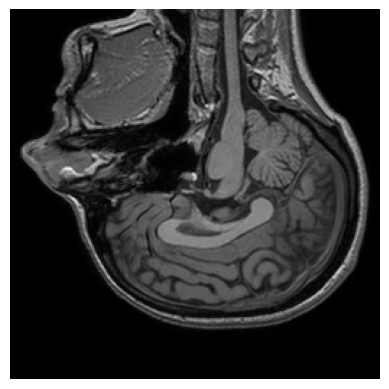

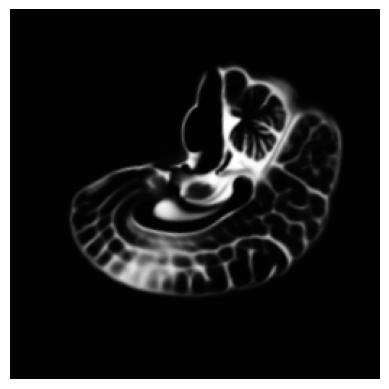

In [4]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

# Carregar a imagem
imagem = sitk.ReadImage("images_filtered/IXI002-Guys-0828-T1.nii.gz")
atlas_csf = sitk.ReadImage("atlas_resampled/IXI002-Guys-0828-T1.nii.gz/mni_csf.nii.gz")

# Converter para array numpy
array_imagem = sitk.GetArrayFromImage(imagem)
array_atlas = sitk.GetArrayFromImage(atlas_csf)

indice_fatia = array_imagem.shape[0] // 2  
fatia_img = array_imagem[indice_fatia, :, :]

indice_fatia = array_atlas.shape[0] // 2  
fatia_atlas = array_atlas[indice_fatia, :, :]


# Exibir a imagem
plt.imshow(fatia_img, cmap="gray")  # Use "gray" para imagens em preto e branco
plt.axis("off")  # Remove os eixos
plt.show()


# Exibir a imagem
plt.imshow(fatia_atlas, cmap="gray")  # Use "gray" para imagens em preto e branco
plt.axis("off")  # Remove os eixos
plt.show()

TypeError: Invalid shape (9830400,) for image data

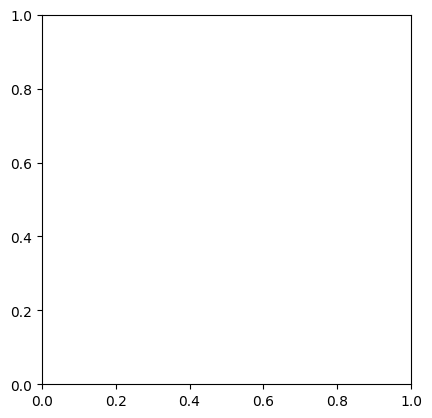

In [5]:

atlas_csf = sitk.ReadImage("atlas_resampled/IXI002-Guys-0828-T1.nii.gz/mni_csf.nii.gz")
atlas_gm = sitk.ReadImage("atlas_resampled/IXI002-Guys-0828-T1.nii.gz/mni_gm.nii.gz")
atlas_wm = sitk.ReadImage("atlas_resampled/IXI002-Guys-0828-T1.nii.gz/mni_wm.nii.gz")

atlas_csf_array = sitk.GetArrayFromImage(atlas_csf)
atlas_gm_array = sitk.GetArrayFromImage(atlas_gm)
atlas_wm_array = sitk.GetArrayFromImage(atlas_wm)


binary_array_csf = (atlas_csf_array > 0.98).astype(np.uint8)
binary_array_gm = (atlas_gm_array > 0.98).astype(np.uint8)
binary_array_wm = (atlas_wm_array > 0.98).astype(np.uint8)

# Converter de volta para imagem SimpleITK
binary_image_csf = sitk.GetImageFromArray(binary_array_csf)
binary_image_csf.CopyInformation(atlas_csf)  # Mantém metadados da imagem original

binary_image_gm = sitk.GetImageFromArray(binary_array_gm)
binary_image_gm.CopyInformation(atlas_gm)  # Mantém metadados da imagem original

binary_image_wm = sitk.GetImageFromArray(binary_array_wm)
binary_image_wm.CopyInformation(atlas_wm)  # Mantém metadados da imagem original


# num_pixels_1 = np.count_nonzero(binary_array)

# print(f"Número de pixels com valor 1: {num_pixels_1}")

sitk.WriteImage(binary_image_csf, "mni_csf_binary.nii.gz")
sitk.WriteImage(binary_image_gm, "mni_gm_binary.nii.gz")
sitk.WriteImage(binary_image_wm, "mni_wm_binary.nii.gz")

# Exibir a imagem
plt.imshow(binary_image_wm, cmap="gray")  # Use "gray" para imagens em preto e branco
plt.axis("off")  # Remove os eixos
plt.show()


In [42]:
binary_atlas_csf = sitk.ReadImage("mni_csf_binary.nii.gz")
binary_atlas_gm = sitk.ReadImage("mni_gm_binary.nii.gz")
binary_atlas_wm = sitk.ReadImage("mni_wm_binary.nii.gz")

img_sitk = sitk.ReadImage("images_filtered/IXI002-Guys-0828-T1.nii.gz")
img_np = sitk.GetArrayFromImage(img_sitk)

mask_np_csf = sitk.GetArrayFromImage(binary_atlas_csf)

# Garantir que a máscara seja binária (0 e 1)
mask_np_csf = (mask_np_csf > 0).astype(np.uint8)


mask_np_gm = sitk.GetArrayFromImage(binary_atlas_gm)

# Garantir que a máscara seja binária (0 e 1)
mask_np_gm = (mask_np_gm > 0).astype(np.uint8)


mask_np_wm = sitk.GetArrayFromImage(binary_atlas_wm)

# Garantir que a máscara seja binária (0 e 1)
mask_np_wm = (mask_np_wm > 0).astype(np.uint8)

# Multiplicar elemento a elemento
result_np_csf = (img_np * mask_np_csf)
result_np_gm = (img_np * mask_np_gm)
result_np_wm = (img_np * mask_np_wm)

# Converter de volta para SimpleITK
result_sitk_csf = sitk.GetImageFromArray(result_np_csf)
result_sitk_csf.CopyInformation(img_sitk)  # Copiar metadados da imagem original

result_sitk_gm = sitk.GetImageFromArray(result_np_gm)
result_sitk_gm.CopyInformation(img_sitk)  # Copiar metadados da imagem original

result_sitk_wm = sitk.GetImageFromArray(result_np_wm)
result_sitk_wm.CopyInformation(img_sitk)  # Copiar metadados da imagem original

# Salvar a nova imagem
sitk.WriteImage(result_sitk_csf, "result_sitk_csf.nii.gz")
sitk.WriteImage(result_sitk_gm, "result_sitk_gm.nii.gz")
sitk.WriteImage(result_sitk_wm, "result_sitk_wm.nii.gz")




In [43]:
result_atlas_csf = sitk.ReadImage("result_sitk_csf.nii.gz")
result_atlas_gm = sitk.ReadImage("result_sitk_gm.nii.gz")
result_atlas_wm = sitk.ReadImage("result_sitk_wm.nii.gz")

result_np_csf = sitk.GetArrayFromImage(result_atlas_csf)
result_np_gm = sitk.GetArrayFromImage(result_atlas_gm)
result_np_wm = sitk.GetArrayFromImage(result_atlas_wm)



(150, 256, 256)

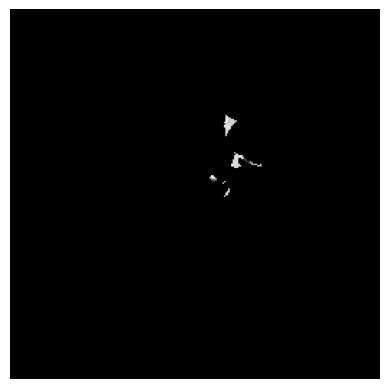

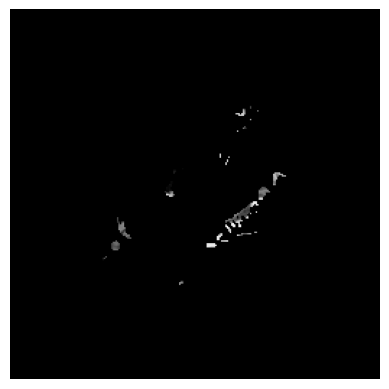

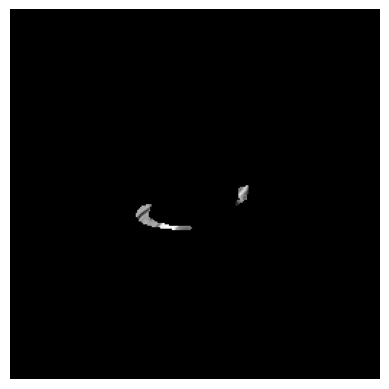

In [44]:


indice_fatia_csf = result_np_csf.shape[0] // 2  
fatia_img_csf = result_np_csf[indice_fatia_csf, :, :]

indice_fatia_gm = result_np_gm.shape[0] // 2  
fatia_img_gm = result_np_gm[indice_fatia_gm, :, :]

indice_fatia_wm = result_np_wm.shape[0] // 2  
fatia_img_wm = result_np_wm[indice_fatia_wm, :, :]


# Exibir a imagem
plt.imshow(fatia_img_csf, cmap="gray")  # Use "gray" para imagens em preto e branco
plt.axis("off")  # Remove os eixos
plt.show()

# Exibir a imagem
plt.imshow(fatia_img_gm, cmap="gray")  # Use "gray" para imagens em preto e branco
plt.axis("off")  # Remove os eixos
plt.show()

# Exibir a imagem
plt.imshow(fatia_img_wm, cmap="gray")  # Use "gray" para imagens em preto e branco
plt.axis("off")  # Remove os eixos
plt.show()

In [ ]:
num_pixels_csf = np.count_nonzero(result_np_csf)
print(f"Número de pixels com valor 1: {num_pixels_csf}\n")
num_pixels_gm = np.count_nonzero(result_np_gm)
print(f"Número de pixels com valor 1: {num_pixels_gm}\n")
num_pixels_wm = np.count_nonzero(result_np_wm)
print(f"Número de pixels com valor 1: {num_pixels_wm}\n")



In [32]:

num_pixels_csf = np.count_nonzero(fatia_img_csf)
print(f"Número de pixels com valor 1: {num_pixels_csf}\n")
num_pixels_gm = np.count_nonzero(fatia_img_gm)
print(f"Número de pixels com valor 1: {num_pixels_gm}\n")
num_pixels_wm = np.count_nonzero(fatia_img_wm)
print(f"Número de pixels com valor 1: {num_pixels_wm}\n")

Número de pixels com valor 1: 154

Número de pixels com valor 1: 416

Número de pixels com valor 1: 277



In [38]:
flattened_array = fatia_img_csf.flatten()


print(fatia_img_csf.shape)
num_rows, num_cols = fatia_img_csf.shape
for num_row in range(num_rows):
    for num_col in range(num_cols):
        if fatia_img_csf[num_row,num_col] ==1:
            fatia_img_csf[num_row,num_col] 


(256, 256)


In [41]:
max = np.max(flattened_array)
print(max)


493.0


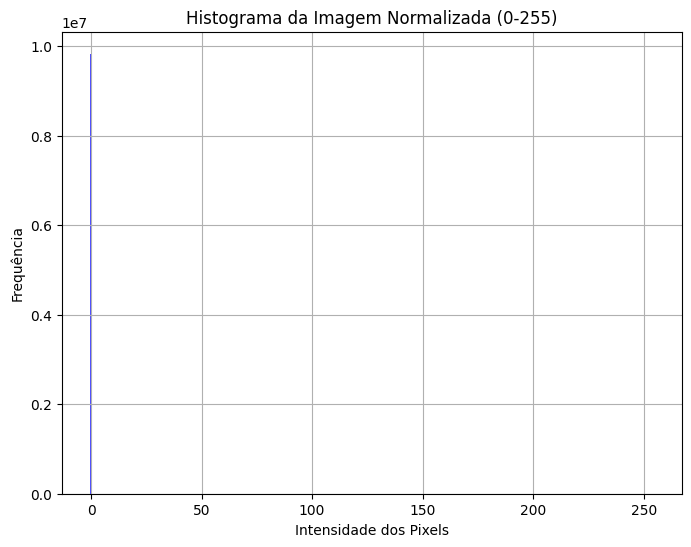

In [12]:
# Normalizar para o intervalo [0, 255]
image_min = result_np_csf.min()
image_max = result_np_csf.max()
normalized_array = (result_np_csf - image_min) / (image_max - image_min) * 255

# Converter para inteiros (uint8)
image_uint8 = normalized_array.astype(np.uint8)

hist, bin_edges = np.histogram(image_uint8.flatten(), bins=256, range=(0, 255))

# Exibir histograma
plt.figure(figsize=(8, 6))
plt.bar(bin_edges[:-1], hist, width=1, color='blue', alpha=0.7)
plt.xlabel("Intensidade dos Pixels")
plt.ylabel("Frequência")
plt.title("Histograma da Imagem Normalizada (0-255)")
plt.grid(True)
plt.show()


In [11]:

result_sitk_wm = sitk.GetImageFromArray(result_np_csf)

indice_fatia = result_sitk_wm.shape[0] // 2  
fatia_atlas = result_sitk_wm[indice_fatia, :, :]

# Exibir a imagem
plt.figure(figsize=(8, 6))
plt.imshow(fatia_atlas, "gray")  # Use "gray" para imagens em preto e branco
#plt.axis("off")  # Remove os eixos
plt.show()


AttributeError: 'Image' object has no attribute 'shape'